In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

In [3]:
tf.random.set_seed(42)

#### Dataset

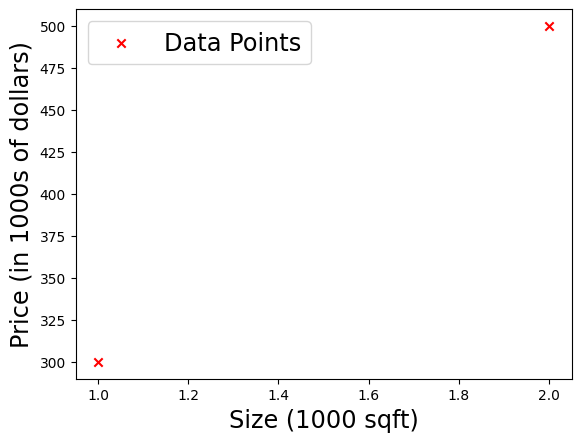

In [4]:
x_train = np.array([[1.0],[2.0]], dtype=np.float32)
y_train = np.array([[300.0],[500.0]], dtype=np.float32)

fig, ax = plt.subplots(1,1)
ax.scatter(x_train, y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()


In [5]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')
# A Dense (units=1) layer means: output = w * input + b

In [6]:
linear_layer.get_weights()
# get_weights() gives [w, b]. At first, they are initialized by Tensorflow

[]

In [7]:
a1 = linear_layer(x_train)
print(a1)

tf.Tensor(
[[-1.1282918]
 [-2.2565837]], shape=(2, 1), dtype=float32)


In [8]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-1.1282918]], b=[0.]


In [9]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w,set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [10]:
a1 = linear_layer(x_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,x_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [11]:
prediction_tf = linear_layer(x_train)
prediction_np = np.dot(x_train,set_w)+set_b

In [12]:
def plt_linear(X, Y, prediction_tf, prediction_np):
    fig, ax = plt.subplots(1,2, figsize=(12,5))

    # TensorFlow prediction plot
    ax[0].scatter(X, Y, c='r', marker='x', label="Data Points")
    ax[0].plot(X, prediction_tf, label="model output", c='b')
    ax[0].set_title("TensorFlow prediction", fontsize=14)
    ax[0].set_xlabel("Size (1000 sqft)", fontsize=12)
    ax[0].set_ylabel("Price (in 1000s of dollars)", fontsize=12)
    ax[0].legend()
    ax[0].text(1.2, 400, "y=200x + 100", fontsize=12, color="magenta")

    # NumPy prediction plot
    ax[1].scatter(X, Y, c='r', marker='x', label="Data Points")
    ax[1].plot(X, prediction_np, label="model output", c='b')
    ax[1].set_title("Numpy prediction", fontsize=14)
    ax[1].set_xlabel("Size (1000 sqft)", fontsize=12)
    ax[1].set_ylabel("Price (in 1000s of dollars)", fontsize=12)
    ax[1].legend()
    ax[1].text(1.2, 400, "y=200x + 100", fontsize=12, color="magenta")

    plt.show()

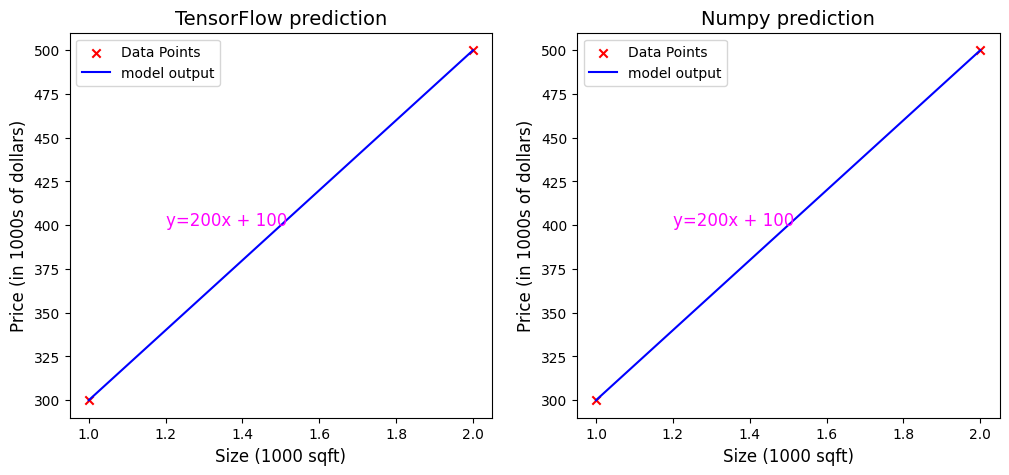

In [13]:
plt_linear(x_train, y_train, prediction_tf, prediction_np)

### Neuron with sigmoid activation
f(x) = g(w.x + b)
g(x) = sigmoid(x)

In [24]:
x_train = np.array([[0.,1,2,3,4,5]], dtype=np.float32).reshape(-1,1)
y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)

In [25]:
pos = y_train == 1
neg = y_train == 0
x_train[pos]

array([3., 4., 5.], dtype=float32)

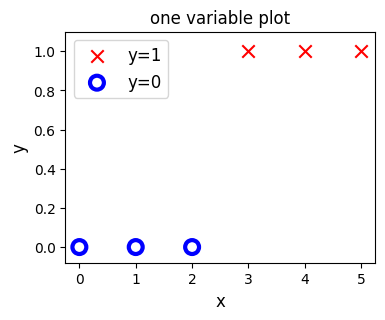

In [29]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors="blue",lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [30]:
model = Sequential(
    [ 
        tf.keras.layers.Dense(1,input_dim=1,activation='sigmoid',name='L1')
    ]
)

c:\Users\Ragul\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-0.5616311]] [0.]
(1, 1) (1,)


In [33]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [34]:
a1 = model.predict(x_train[0].reshape(1,1))
print(a1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[[0.01098694]]


In [42]:
def sigmoidnp(z):
    return 1/(1+np.exp(-z))

In [43]:
alog = sigmoidnp(np.dot(set_w,x_train[0].reshape(1,1)) + set_b)
print(alog)

[[0.01098694]]
